# Données météo vieux port + capteur

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv

In [2]:
meteo_data = pd.read_csv("../Meteo/Marseille_2022-10-01_to_2022-10-25.csv")
sensor_data = pd.read_csv("../Data_purple_air/data_vieux_port_1-25-novembre")

In [3]:
len(meteo_data)

596

In [4]:

print(meteo_data.columns.tolist())

meteo_data['Date'] = pd.to_datetime(meteo_data['datetime']).dt.date
meteo_data['Time'] = pd.to_datetime(meteo_data['datetime']).dt.time

meteo_data



['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon', 'stations']


,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,Date,Time
0,Marseille,2022-10-01T00:00:00,13.9,13.9,8.0,67.21,0.0,0,NaN,0,...,41.5,NaN,NaN,NaN,NaN,Clear,clear-night,"07563099999,07648099999,07647099999,LFML,07650...",2022-10-01,00:00:00
1,Marseille,2022-10-01T01:00:00,13.8,13.8,8.1,68.37,0.0,0,NaN,0,...,41.5,NaN,NaN,NaN,NaN,Clear,clear-night,"07563099999,07648099999,07647099999,LFML,07650...",2022-10-01,01:00:00
2,Marseille,2022-10-01T02:00:00,13.6,13.6,7.8,68.07,0.0,0,NaN,0,...,41.5,NaN,NaN,NaN,NaN,Clear,clear-night,"07563099999,07648099999,07647099999,LFML,07650...",2022-10-01,02:00:00
3,Marseille,2022-10-01T03:00:00,13.5,13.5,7.8,68.48,0.0,0,NaN,0,...,41.5,NaN,NaN,NaN,NaN,Clear,clear-night,"07563099999,07648099999,07647099999,LFML,07650...",2022-10-01,03:00:00
4,Marseille,2022-10-01T04:00:00,12.8,12.8,7.8,71.23,0.0,0,NaN,0,...,41.5,NaN,NaN,NaN,NaN,Clear,clear-night,"07563099999,07648099999,07647099999,LFML,07650...",2022-10-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Marseille,2022-10-25T15:00:00,25.7,25.7,16.3,55.97,0.0,0,NaN,0,...,15.4,570.0,2.1,6.0,NaN,Overcast,cloudy,"07563099999,07648099999,E6174,07647099999,LFML...",2022-10-25,15:00:00
592,Marseille,2022-10-25T16:00:00,26.3,26.3,15.4,51.03,0.0,0,NaN,0,...,16.6,332.0,1.2,3.0,NaN,Partially cloudy,partly-cloudy-day,"07563099999,07648099999,E6174,07647099999,LFML...",2022-10-25,16:00:00
593,Marseille,2022-10-25T17:00:00,24.5,24.5,15.4,56.88,0.0,0,NaN,0,...,25.5,155.0,0.6,2.0,NaN,Clear,clear-day,"07563099999,07648099999,E6174,07647099999,LFML...",2022-10-25,17:00:00
594,Marseille,2022-10-25T18:00:00,22.8,22.8,16.2,66.16,0.0,0,NaN,0,...,28.1,32.0,0.1,0.0,NaN,Clear,clear-day,"07563099999,07648099999,E6174,07647099999,LFML...",2022-10-25,18:00:00


In [5]:
meteo_data.fillna(value={"humidity":0}).humidity.head()
meteo_data.describe()


,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.0,596.0,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,292.000000,292.000000,292.000000,0.0
mean,19.527349,19.529866,15.009060,76.344262,0.005693,5.704698,0.0,0.0,20.457215,11.176678,170.182718,1020.278020,66.214094,21.687081,254.383562,0.914726,2.527397,NaN
std,3.518184,3.524099,2.068309,12.382209,0.037243,23.212718,0.0,0.0,10.653919,6.837785,95.769529,3.626875,40.673768,9.075366,212.924870,0.769493,2.197140,NaN
min,10.800000,10.800000,6.800000,46.290000,0.000000,0.000000,0.0,0.0,5.400000,0.500000,2.000000,1013.100000,0.000000,1.200000,1.000000,0.000000,0.000000,NaN
25%,16.700000,16.700000,13.900000,67.050000,0.000000,0.000000,0.0,0.0,11.500000,5.800000,101.000000,1017.500000,22.750000,14.900000,61.500000,0.200000,1.000000,NaN
50%,19.600000,19.600000,15.100000,77.540000,0.000000,0.000000,0.0,0.0,17.550000,9.150000,137.500000,1019.600000,90.000000,19.650000,210.000000,0.800000,2.000000,NaN
75%,22.500000,22.500000,16.200000,87.555000,0.000000,0.000000,0.0,0.0,27.200000,15.425000,267.000000,1022.325000,100.000000,27.100000,398.500000,1.425000,4.000000,NaN
max,28.300000,28.500000,20.100000,98.250000,0.526000,100.000000,0.0,0.0,58.000000,38.200000,360.000000,1028.200000,100.000000,41.500000,768.000000,2.800000,8.000000,NaN


In [6]:


sensor_data['Date'] = pd.to_datetime(sensor_data['created_at']).dt.date
sensor_data['Time'] = pd.to_datetime(sensor_data['created_at']).dt.time

In [50]:
sensor_data 

,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9,Dates,Time
0,2022-10-01 00:00:00 UTC,0.00,0.00,0.02,6546.0,-90.17,61.80,48.93,0.00,NaN,2022-10-01,00:00:00
1,2022-10-01 01:00:00 UTC,0.00,0.00,0.04,6606.0,-90.30,61.57,51.27,0.00,NaN,2022-10-01,01:00:00
2,2022-10-01 02:00:00 UTC,0.00,0.01,0.12,6666.0,-89.53,61.37,51.43,0.01,NaN,2022-10-01,02:00:00
3,2022-10-01 03:00:00 UTC,0.00,0.02,0.11,6726.0,-90.47,61.57,49.87,0.02,NaN,2022-10-01,03:00:00
4,2022-10-01 04:00:00 UTC,0.93,1.97,2.28,6786.0,-89.80,61.03,50.83,1.97,NaN,2022-10-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
591,2022-10-25 15:00:00 UTC,0.26,1.93,2.44,4358.0,-88.87,78.93,46.20,1.92,NaN,2022-10-25,15:00:00
592,2022-10-25 16:00:00 UTC,0.69,3.03,3.62,4418.0,-88.40,75.13,55.50,3.03,NaN,2022-10-25,16:00:00
593,2022-10-25 17:00:00 UTC,0.45,2.65,3.11,4478.0,-88.23,73.53,57.23,2.65,NaN,2022-10-25,17:00:00
594,2022-10-25 18:00:00 UTC,2.99,5.98,6.59,4538.0,-88.63,73.80,61.80,5.98,NaN,2022-10-25,18:00:00


In [7]:
df_merged = pd.merge(sensor_data, meteo_data, on=['Date','Time'], how='inner')

In [8]:
df_merged

,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,2022-10-01 00:00:00 UTC,0.00,0.00,0.02,6546.0,-90.17,61.80,48.93,0.00,NaN,...,1015.2,0.0,41.5,NaN,NaN,NaN,NaN,Clear,clear-night,"07563099999,07648099999,07647099999,LFML,07650..."
1,2022-10-01 01:00:00 UTC,0.00,0.00,0.04,6606.0,-90.30,61.57,51.27,0.00,NaN,...,1015.6,0.0,41.5,NaN,NaN,NaN,NaN,Clear,clear-night,"07563099999,07648099999,07647099999,LFML,07650..."
2,2022-10-01 02:00:00 UTC,0.00,0.01,0.12,6666.0,-89.53,61.37,51.43,0.01,NaN,...,1016.3,0.1,41.5,NaN,NaN,NaN,NaN,Clear,clear-night,"07563099999,07648099999,07647099999,LFML,07650..."
3,2022-10-01 03:00:00 UTC,0.00,0.02,0.11,6726.0,-90.47,61.57,49.87,0.02,NaN,...,1017.2,0.1,41.5,NaN,NaN,NaN,NaN,Clear,clear-night,"07563099999,07648099999,07647099999,LFML,07650..."
4,2022-10-01 04:00:00 UTC,0.93,1.97,2.28,6786.0,-89.80,61.03,50.83,1.97,NaN,...,1017.5,0.1,41.5,NaN,NaN,NaN,NaN,Clear,clear-night,"07563099999,07648099999,07647099999,LFML,07650..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,2022-10-25 15:00:00 UTC,0.26,1.93,2.44,4358.0,-88.87,78.93,46.20,1.92,NaN,...,1017.5,91.7,15.4,570.0,2.1,6.0,NaN,Overcast,cloudy,"07563099999,07648099999,E6174,07647099999,LFML..."
592,2022-10-25 16:00:00 UTC,0.69,3.03,3.62,4418.0,-88.40,75.13,55.50,3.03,NaN,...,1017.3,25.0,16.6,332.0,1.2,3.0,NaN,Partially cloudy,partly-cloudy-day,"07563099999,07648099999,E6174,07647099999,LFML..."
593,2022-10-25 17:00:00 UTC,0.45,2.65,3.11,4478.0,-88.23,73.53,57.23,2.65,NaN,...,1017.4,0.8,25.5,155.0,0.6,2.0,NaN,Clear,clear-day,"07563099999,07648099999,E6174,07647099999,LFML..."
594,2022-10-25 18:00:00 UTC,2.99,5.98,6.59,4538.0,-88.63,73.80,61.80,5.98,NaN,...,1017.2,0.0,28.1,32.0,0.1,0.0,NaN,Clear,clear-day,"07563099999,07648099999,E6174,07647099999,LFML..."


9.055252525252525

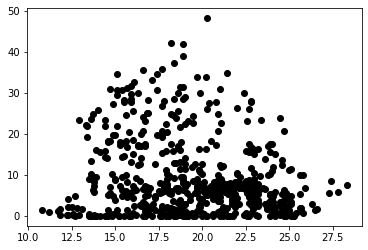

In [40]:
df_filtered = df_merged.loc[df_merged['temp'] > 0.1 ]
df_filtered

import matplotlib.pyplot as plt
plt.plot(df_filtered['temp'], df_filtered['PM2.5_CF1_ug/m3'], 'o', color='black');

mean_data_meteo = (df_filtered['temp']).mean()
mean_points = (df_filtered['PM2.5_CF1_ug/m3']).mean()
mean_data_meteo
mean_points
#['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon', 'stations']
